# <b> Decision Tree</b>

<h1>1. Part 1 </h1>

## 1.1 Loading Data

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import numpy as np
from scipy.sparse import hstack

## Datapoints: 50000

In [7]:
import pandas
data = pandas.read_csv('preprocessed_data.csv',nrows=50000)

In [8]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [9]:
data.head(2)

school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

  clean_categories                 clean_subcategories  \
0     math_science  appliedsciences health_lifescience   
1     specialneeds                        specialneeds   

                                               essay   price  
0  i fortunate enough use fairy tale stem kits cl...  725.05  
1  imagine 8 9 years old you third grade classroo...  213.03

In [10]:
y=data["project_is_approved"]
x=data.drop("project_is_approved",axis=1)

In [86]:
x.head(2)

school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   

   teacher_number_of_previously_posted_projects clean_categories  \
0                                            53     math_science   
1                                             4     specialneeds   

                  clean_subcategories  \
0  appliedsciences health_lifescience   
1                        specialneeds   

                                               essay   price  
0  i fortunate enough use fairy tale stem kits cl...  725.05  
1  imagine 8 9 years old you third grade classroo...  213.03

In [12]:
# Splitting Dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

## Categorical Features

### 1. school_state

In [13]:
vectorizer= CountVectorizer(binary=True)
vectorizer.fit(x_train["school_state"])

x_train_state=vectorizer.transform(x_train["school_state"]) #VECTORIZING SCHOOL STATE IN TRAIN DATASET 
x_test_state=vectorizer.transform(x_test["school_state"]) #VECTORIZING SCHOOL STATE IN TEST DATASET

print(x_train_state.shape)
print(x_test_state.shape)

(40000, 51)
(10000, 51)


### 2. teacher_prefix

In [14]:
vectorizer= CountVectorizer(binary=True)
vectorizer.fit(x_train["teacher_prefix"])

x_train_prefix=vectorizer.transform(x_train["teacher_prefix"]) #VECTORIZING TEACHER PREFIX IN TRAIN DATASE
x_test_prefix=vectorizer.transform(x_test["teacher_prefix"]) #VECTORIZING TEACHER PREFIX IN TEST DATASET

print(x_train_prefix.shape)
print(x_test_prefix.shape)

(40000, 5)
(10000, 5)


### 3. project_grade_category

In [15]:
vectorizer= CountVectorizer(binary=True)
vectorizer.fit(x_train["project_grade_category"])

x_train_grade=vectorizer.transform(x_train["project_grade_category"]) #VECTORIZING project_grade_category IN TRAIN DATASET
x_test_grade=vectorizer.transform(x_test["project_grade_category"]) #VECTORIZING project_grade_category IN TEST DATASET

print(x_train_grade.shape)
print(x_test_grade.shape)

(40000, 4)
(10000, 4)


### 4. clean_categories

In [16]:
vectorizer= CountVectorizer(binary=True)
vectorizer.fit(x_train["clean_categories"])

x_train_categories=vectorizer.transform(x_train["clean_categories"]) #VECTORIZING clean_categories IN TRAIN DATASET
x_test_categories=vectorizer.transform(x_test["clean_categories"]) #VECTORIZING clean_categories IN TEST DATASET

print(x_train_categories.shape)
print(x_test_categories.shape)

(40000, 9)
(10000, 9)


### 5. clean_subcategories

In [17]:
vectorizer= CountVectorizer(binary=True)
vectorizer.fit(x_train["clean_subcategories"])

x_train_subcategories=vectorizer.transform(x_train["clean_subcategories"]) #VECTORIZING clean_subcategories IN TRAIN DATASET
x_test_subcategories=vectorizer.transform(x_test["clean_subcategories"]) #VECTORIZING clean_subcategories IN TEST DATASET

print(x_train_subcategories.shape)
print(x_test_subcategories.shape)

(40000, 30)
(10000, 30)


## Numerical Features

### 1.teacher_number_of_previously_posted_projects

In [18]:
# NORMALIZING teacher_number_of_previously_posted_projects
normalizer= Normalizer()
normalizer.fit(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

x_train_previous_project=normalizer.transform(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
x_test_previous_project=normalizer.transform(x_test["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

print(x_train_previous_project.shape)
print(x_test_previous_project.shape)

(40000, 1)
(10000, 1)


### 2. price

In [19]:
# NORMALIZING price
normalizer= Normalizer()
normalizer.fit(x_train["price"].values.reshape(-1,1))

x_train_price=normalizer.transform(x_train["price"].values.reshape(-1,1))
x_test_price=normalizer.transform(x_test["price"].values.reshape(-1,1))

print(x_train_price.shape)
print(x_test_price.shape)

(40000, 1)
(10000, 1)


## Essay

## 1.Tfidf

In [20]:
vectorizer= TfidfVectorizer(min_df=10, ngram_range=(1,4) ,max_features=5000)
vectorizer.fit(x_train["essay"])

x_train_tfidf_vect=vectorizer.transform(x_train["essay"]) #VECTORIZING TRAIN ESSAY BY TFIDF
x_test_tfidf_vect=vectorizer.transform(x_test["essay"]) #VECTORIZING TEST ESSAY BY TFIDF

print(x_train_tfidf_vect.shape)
print(x_test_tfidf_vect.shape)

(40000, 5000)
(10000, 5000)


### 2. Tfidf Word2Vec

In [21]:
#VECTORIZING TRAIN ESSAY BY TFIDF Word 2 Vec
vectorizer=TfidfVectorizer()
tfidf= vectorizer.fit(x_train["essay"].values)

tfidf_dict = dict(zip(tfidf.get_feature_names(),list(tfidf.idf_)))
tfidf_words = set(tfidf.get_feature_names())

x_train_essay_tfidfwv=[]
for i in tqdm(x_train["essay"].values):
    wv_vect=np.zeros(300)
    tfidf_weight=0
    for j in i.split():
        if j in glove_words and j in tfidf_words:
            word_vec = model[j]
            
            tfidf_value=tfidf_dict[j]*(i.count(j)/len(i.split()))
            multiply = word_vec * tfidf_value
            
            wv_vect += multiply
            tfidf_weight += tfidf_value
            
    x_train_essay_tfidfwv.append((wv_vect/tfidf_weight))

100%|██████████| 40000/40000 [01:50<00:00, 361.84it/s]


In [22]:
#VECTORIZING TEST ESSAY BY TFIDF Word 2 Vec
x_test_essay_tfidfwv=[]
for i in tqdm(x_test["essay"].values):
    wv_vect=np.zeros(300)
    tfidf_weight=0
    for j in i.split():
        if j in glove_words and j in tfidf_words:
            word_vec = model[j]
            
            tfidf_value=tfidf_dict[j]*(i.count(j)/len(i.split()))
            multiply = word_vec * tfidf_value
            
            wv_vect += multiply
            tfidf_weight += tfidf_value
            
    x_test_essay_tfidfwv.append((wv_vect/tfidf_weight))

100%|██████████| 10000/10000 [00:26<00:00, 384.15it/s]


In [88]:
print(len(x_train_essay_tfidfwv))
print(len(x_train_essay_tfidfwv[0]))

40000
300


In [89]:
print(len(x_test_essay_tfidfwv))
print(len(x_test_essay_tfidfwv[0]))

10000
300


## Sentiment scores

In [25]:
#COMPUTE SENTIMENT SCORE FOR TRAIN DATASET
sentiment=SentimentIntensityAnalyzer()
negative_train=[] #FOR STORING NEGATIVE SENTIMENT SCORE
neutral_train=[]  #FOR STORING NEUTRAL SENTIMENT SCORE
positive_train=[] #FOR STORING POSITIVE SENTIMENT SCORE
compound_train=[]  #FOR STORING COMPOUND SENTIMENT SCORE

for i in tqdm(x_train["essay"]): # FOR ALL PROCESSED ESSAY IN DATASET
    
    a=sentiment.polarity_scores(i) #COMPUTE SENTIMENT SCORE
    
    negative_train.append(a["neg"]) #APPENDING NEGATIVE SENTIMENT SCORE
    neutral_train.append(a["neu"])  #APPENDING NEUTRAL SENTIMENT SCORE
    positive_train.append(a["pos"])  #APPENDING POSITIVE SENTIMENT SCORE
    compound_train.append(a["compound"])  #APPENDING COMPOUND SENTIMENT SCORE

# CONVERTING TO ARRAY DATATYPE
negative_train=np.array(negative_train)
neutral_train=np.array(neutral_train)
positive_train=np.array(positive_train)
compound_train=np.array(compound_train)

100%|██████████| 40000/40000 [01:31<00:00, 435.87it/s]


In [26]:
#COMPUTE SENTIMENT SCORE FOR TRAIN DATASET
negative_test=[] #FOR STORING NEGATIVE SENTIMENT SCORE
neutral_test=[]  #FOR STORING NEUTRAL SENTIMENT SCORE
positive_test=[]  #FOR STORING POSITIVE SENTIMENT SCORE
compound_test=[]  #FOR STORING COMPOUND SENTIMENT SCORE

for i in tqdm(x_test["essay"]):  # FOR ALL PROCESSED ESSAY IN DATASET
    
    a=sentiment.polarity_scores(i) #COMPUTE SENTIMENT SCORE
    
    negative_test.append(a["neg"]) #APPENDING NEGATIVE SENTIMENT SCORE
    neutral_test.append(a["neu"]) #APPENDING NEUTRAL SENTIMENT SCORE
    positive_test.append(a["pos"]) #APPENDING POSITIVE SENTIMENT SCORE
    compound_test.append(a["compound"]) #APPENDING COMPOUND SENTIMENT SCORE

# CONVERTING TO ARRAY DATATYPE    
negative_test=np.array(negative_test)
neutral_test=np.array(neutral_test)
positive_test=np.array(positive_test)
compound_test=np.array(compound_test)   

100%|██████████| 10000/10000 [00:22<00:00, 439.87it/s]


## CONCATINATE

## 1. Tfidf Concat

In [27]:
x_train_tfidf_vector=hstack( (x_train_prefix,x_train_grade,x_train_state,x_train_categories,x_train_subcategories,x_train_price,x_train_previous_project,x_train_tfidf_vect,negative_train.reshape(-1,1),neutral_train.reshape(-1,1),positive_train.reshape(-1,1),compound_train.reshape(-1,1))).tocsr()
x_test_tfidf_vector=hstack( (x_test_prefix,x_test_grade,x_test_state,x_test_categories,x_test_subcategories,x_test_price,x_test_previous_project,x_test_tfidf_vect,negative_test.reshape(-1,1),neutral_test.reshape(-1,1),positive_test.reshape(-1,1),compound_test.reshape(-1,1))).tocsr()

In [28]:
x_train_tfidf_vector.shape

(40000, 5105)

In [29]:
x_test_tfidf_vector.shape

(10000, 5105)

###  2. Tfidf W2V Concat

In [30]:
x_train_tfidfwv_vector=hstack( (x_train_prefix,x_train_grade,x_train_state,x_train_categories,x_train_subcategories,x_train_price,x_train_previous_project,x_train_essay_tfidfwv,negative_train.reshape(-1,1),neutral_train.reshape(-1,1),positive_train.reshape(-1,1),compound_train.reshape(-1,1))).tocsr()
x_test_tfidfwv_vector=hstack( (x_test_prefix,x_test_grade,x_test_state,x_test_categories,x_test_subcategories,x_test_price,x_test_previous_project,x_test_essay_tfidfwv,negative_test.reshape(-1,1),neutral_test.reshape(-1,1),positive_test.reshape(-1,1),compound_test.reshape(-1,1))).tocsr()

In [31]:
x_train_tfidfwv_vector.shape

(40000, 405)

In [32]:
x_test_tfidfwv_vector.shape

(10000, 405)

## Hyperparameter Tuning Set1

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import roc_curve, auc
import math
from wordcloud import WordCloud, STOPWORDS 
import warnings
warnings.filterwarnings("ignore")

In [34]:
# HYPERPARAMETER TUNING  set 1
neigh=DecisionTreeClassifier() #INITIALIZING THE CLASSIFIER
parameters={"max_depth":[1,5,10,50],"min_samples_split":[5,10,100,500]} #PARAMETERS FOR  HYPERPARAMETER TUNING 
clf=GridSearchCV(neigh,parameters,cv=3,scoring="roc_auc",return_train_score=True) #GRIDSEARCH CV
clf.fit(x_train_tfidf_vector,y_train) # FITTING THE TRAINING DATA

result=pd.DataFrame(clf.cv_results_) #STORING RESULTS 
result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.690287      0.024881         0.025933        0.001409   
1        0.621020      0.004655         0.022525        0.001372   
2        0.620349      0.013951         0.023614        0.000479   
3        0.625132      0.012927         0.027272        0.004763   
4        2.784473      0.160533         0.024615        0.000933   
5        2.753375      0.023743         0.023608        0.000471   
6        2.810290      0.110255         0.027272        0.002846   
7        2.586431      0.028415         0.025123        0.000226   
8        6.499611      0.122719         0.025921        0.001417   
9        6.580905      0.222899         0.027605        0.001710   
10       6.062123      0.168627         0.025304        0.001204   
11       5.334891      0.196208         0.024686        0.001130   
12      33.646562      0.601295         0.028288        0.001248   
13      33.377421      0.478866         0.032923        0.007095   
14      30.042485      0.851312         0.027419        0.001459   
15      26.515450      1.586209         0.030948        0.004528   

   param_max_depth param_min_samples_split  \
0                1                       5   
1                1                      10   
2                1                     100   
3                1                     500   
4                5                       5   
5                5                      10   
6                5                     100   
7                5                     500   
8               10                       5   
9               10                      10   
10              10                     100   
11              10                     500   
12              50                       5   
13              50                      10   
14              50                     100   
15              50                     500   

                                         params  split0_test_score  \
0      {'max_depth': 1, 'min_samples_split': 5}           0.514400   
1     {'max_depth': 1, 'min_samples_split': 10}           0.514400   
2    {'max_depth': 1, 'min_samples_split': 100}           0.514400   
3    {'max_depth': 1, 'min_samples_split': 500}           0.514400   
4      {'max_depth': 5, 'min_samples_split': 5}           0.585095   
5     {'max_depth': 5, 'min_samples_split': 10}           0.585563   
6    {'max_depth': 5, 'min_samples_split': 100}           0.586664   
7    {'max_depth': 5, 'min_samples_split': 500}           0.587430   
8     {'max_depth': 10, 'min_samples_split': 5}           0.599320   
9    {'max_depth': 10, 'min_samples_split': 10}           0.599056   
10  {'max_depth': 10, 'min_samples_split': 100}           0.605705   
11  {'max_depth': 10, 'min_samples_split': 500}           0.611457   
12    {'max_depth': 50, 'min_samples_split': 5}           0.525473   
13   {'max_depth': 50, 'min_samples_split': 10}           0.513341   
14  {'max_depth': 50, 'min_samples_split': 100}           0.548058   
15  {'max_depth': 50, 'min_samples_split': 500}           0.581011   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.553993           0.554820         0.541071        0.018862   
1            0.553993           0.554820         0.541071        0.018862   
2            0.553993           0.554820         0.541071        0.018862   
3            0.553993           0.554820         0.541071        0.018862   
4            0.594212           0.597981         0.592430        0.005409   
5            0.594123           0.597854         0.592513        0.005145   
6            0.595260           0.601246         0.594390        0.005985   
7            0.595236           0.601253         0.594640        0.005659   
8            0.588280           0.598114         0.595238        0.004945   
9            0.589353           0.601641         0.596683        0.005290   
10           0.595088     

In [35]:
#PLOTTING THE 3D PLOT WITH PLOTLY
param_max_depth= (result["param_max_depth"])
param_min_sample_split= result["param_min_samples_split"]
cv_score= result["mean_test_score"]
train_score=result["mean_train_score"]

# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=param_max_depth,y=param_min_sample_split,z=train_score, name = 'train')
trace2 = go.Scatter3d(x=param_max_depth,y=param_min_sample_split,z=cv_score, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')
plt.show()

In [36]:
best_depth=10
best_min_samples_split=500

## Training with best_depth and  best_min_samples_split Set1

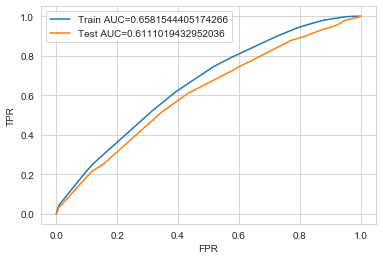

In [37]:
#Training with best_depth and best_min_samples_split Set1
clf1=DecisionTreeClassifier(max_depth=10,min_samples_split=500) ##INITIALIZING THE CLASSIFIER
clf1.fit(x_train_tfidf_vector,y_train) #FITTING THE TRAIN DATESET 

y_train_tfidf_pred=clf1.predict_proba(x_train_tfidf_vector) #PREDICTING THE PROBABILITY FOR TRAIN DATASET
y_test_tfidf_pred=clf1.predict_proba(x_test_tfidf_vector) #PREDICTING THE PROBIBILITY FOR TEST DATASET

# COMPUTING FPR ,TPR ,THRESHOLD
train_fpr_tfidf,train_tpr_tfidf, train_thresholds_tfidf=roc_curve(y_train,y_train_tfidf_pred[:,1])
test_fpr_tfidf,test_tpr_tfidf, train_thresholds_tfidf=roc_curve(y_test,y_test_tfidf_pred[:,1])
# PLOTTING FPR VS TPR 
sns.set_style("whitegrid")
sns.lineplot(x=train_fpr_tfidf , y=train_tpr_tfidf , label="Train AUC=" +  str(auc(train_fpr_tfidf,train_tpr_tfidf)))
sns.lineplot(x=test_fpr_tfidf , y=test_tpr_tfidf , label="Test AUC=" + str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [38]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i >= threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [39]:
best_t_tfidf = find_best_threshold(train_thresholds_tfidf,train_fpr_tfidf,train_tpr_tfidf)

the maximum value of tpr*(1-fpr) 0.3753635889851508 for threshold 0.867


Train confusion matrix


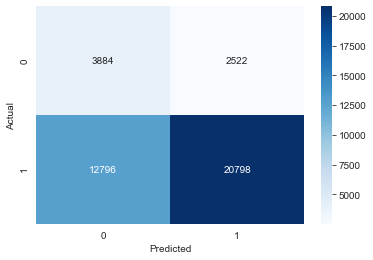

In [40]:
from sklearn.metrics import confusion_matrix
#Computing Confusion Matrix
cm_train_tfidf=confusion_matrix(y_train, predict_with_best_t(y_train_tfidf_pred[:,1], best_t_tfidf))
print("Train confusion matrix")

# PLOTTING CONFUSION MATRIX AS HEAT MAP FOR TRAIN DATASET(SET 1)
sns.heatmap(cm_train_tfidf, annot=True,fmt="d",cmap='Blues')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

Test confusion matrix


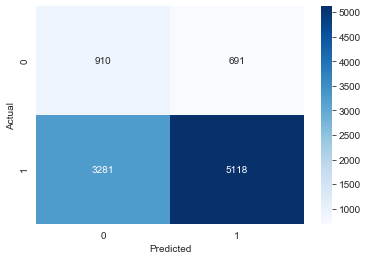

In [41]:
# CONFUSION MATRIX
cm_test_tfidf = confusion_matrix(y_test, predict_with_best_t(y_test_tfidf_pred[:,1] , best_t_tfidf))
print("Test confusion matrix")

# PLOTTING CONFUSION MATRIX AS HEAT MAP FOR TEST DATASET(SET 1)
sns.heatmap(cm_test_tfidf, annot=True,fmt="d",cmap='Blues')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

### Wordcloud

In [47]:
#COMPUTING FALSE POSITIVE DATAPOINTS
y_pvalue_tfidf = predict_with_best_t(y_test_tfidf_pred[:,1] , best_t_tfidf) # PREDICTING Y VALUE FOR BEST THRESHOLD

#CONVERTING TO PANDASDATAFRAME 
y_pvalue_tfidf=pd.DataFrame(y_pvalue_tfidf,index=y_test.index,columns=["y_preg"]) #CONVERTING TO DATAFRAME
y_pvalue_tfidf['y_test']=y_test
fp_index = y_pvalue_tfidf[(y_pvalue_tfidf["y_test"]==0) & (y_pvalue_tfidf["y_preg"]==1)].index

In [90]:
fp_data=x.iloc[fp_index]
fp_data.head(2)

school_state teacher_prefix project_grade_category  \
49164           az             mr             grades_6_8   
44605           fl            mrs          grades_prek_2   

       teacher_number_of_previously_posted_projects  \
49164                                            10   
44605                                             4   

                     clean_categories           clean_subcategories  \
49164       history_civics music_arts  history_geography visualarts   
44605  literacy_language specialneeds         literacy specialneeds   

                                                   essay   price  
49164  what great group students i year they exceptio...  252.23  
44605  my students come variety backgrounds economica...  209.71

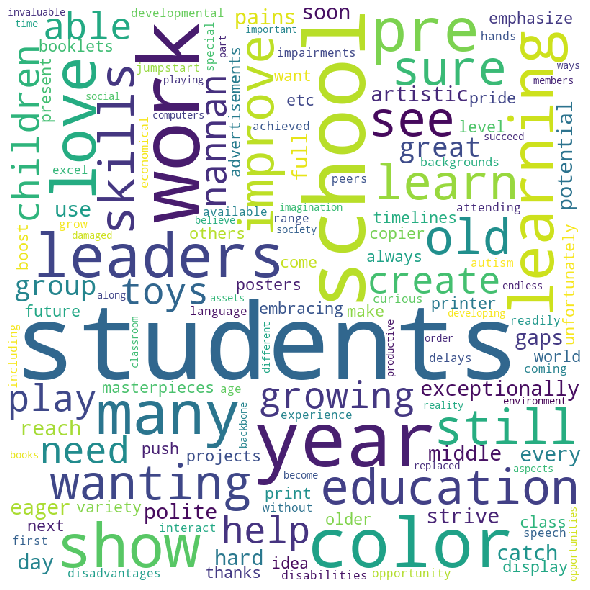

In [49]:
# Wordcloud
#Reference: https://www.geeksforgeeks.org/generating-word-cloud-python/ 
comment_words=''
stopwords = set(STOPWORDS) 
for val in fp_data["essay"][0:2]: 

    comment_words += ( val + " ")

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()     

### Boxplot (PRICE)

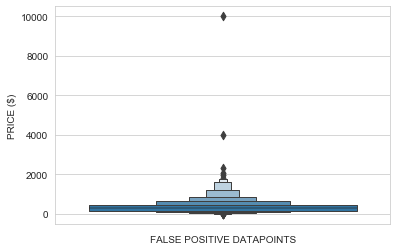

In [50]:
# Boxplot of price
sns.boxenplot(y=fp_data["price"])
plt.xlabel("FALSE POSITIVE DATAPOINTS")
plt.ylabel("PRICE ($)")
plt.show()

### PDF (teacher_number_of_previously_posted_projects)

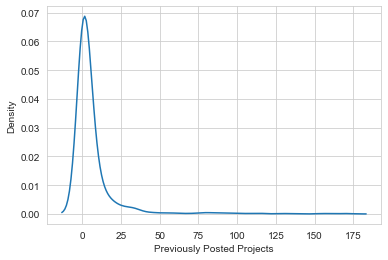

In [51]:
# PDF of teacher_number_of_previously_posted_projects
sns.distplot(x=fp_data["teacher_number_of_previously_posted_projects"],hist=False)
plt.xlabel("Previously Posted Projects")
plt.ylabel("Density")
plt.show()

## Hyperparameter Tuning Set 2

In [53]:
# Hyperparameter Tuning Set 2
neigh=DecisionTreeClassifier()  # INITIALIZING CLASSIFIER
parameters={"max_depth":[1,5,10,50],"min_samples_split":[5,10,100,500]} #PARAMETERS FOR Hyperparameter Tuning

clf=GridSearchCV(neigh,parameters,cv=3,scoring="roc_auc",return_train_score=True) #GRIDSEARCH CV
clf.fit(x_train_tfidfwv_vector,y_train) #FITTING THE DATASET 

result_wv=pd.DataFrame(clf.cv_results_) # STORING THE RESULTS
result_wv

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.527049      0.089469         0.045381        0.003615   
1        1.442896      0.013030         0.043555        0.000474   
2        1.578561      0.092535         0.044563        0.004512   
3        1.552462      0.072641         0.053037        0.007219   
4        6.933950      0.086282         0.047984        0.005760   
5        6.832956      0.115727         0.046466        0.002225   
6        6.842846      0.110485         0.044932        0.002605   
7        6.772096      0.141163         0.046046        0.002581   
8       19.058094      0.289613         0.048208        0.001242   
9       19.290429      0.467716         0.048663        0.000715   
10      18.066381      0.405176         0.045773        0.001502   
11      13.628246      0.274535         0.045877        0.002154   
12      63.064349      1.201633         0.048290        0.001007   
13      62.982330      1.671964         0.046558        0.004080   
14      56.205582      1.552840         0.049907        0.002488   
15      26.909053      0.410380         0.055669        0.005521   

   param_max_depth param_min_samples_split  \
0                1                       5   
1                1                      10   
2                1                     100   
3                1                     500   
4                5                       5   
5                5                      10   
6                5                     100   
7                5                     500   
8               10                       5   
9               10                      10   
10              10                     100   
11              10                     500   
12              50                       5   
13              50                      10   
14              50                     100   
15              50                     500   

                                         params  split0_test_score  \
0      {'max_depth': 1, 'min_samples_split': 5}           0.552612   
1     {'max_depth': 1, 'min_samples_split': 10}           0.552612   
2    {'max_depth': 1, 'min_samples_split': 100}           0.552612   
3    {'max_depth': 1, 'min_samples_split': 500}           0.552612   
4      {'max_depth': 5, 'min_samples_split': 5}           0.605135   
5     {'max_depth': 5, 'min_samples_split': 10}           0.605636   
6    {'max_depth': 5, 'min_samples_split': 100}           0.605135   
7    {'max_depth': 5, 'min_samples_split': 500}           0.605259   
8     {'max_depth': 10, 'min_samples_split': 5}           0.564989   
9    {'max_depth': 10, 'min_samples_split': 10}           0.567601   
10  {'max_depth': 10, 'min_samples_split': 100}           0.577638   
11  {'max_depth': 10, 'min_samples_split': 500}           0.594425   
12    {'max_depth': 50, 'min_samples_split': 5}           0.531237   
13   {'max_depth': 50, 'min_samples_split': 10}           0.525700   
14  {'max_depth': 50, 'min_samples_split': 100}           0.563700   
15  {'max_depth': 50, 'min_samples_split': 500}           0.592915   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.556484           0.545231         0.551443        0.004668   
1            0.556484           0.545231         0.551443        0.004668   
2            0.556484           0.545231         0.551443        0.004668   
3            0.556484           0.545231         0.551443        0.004668   
4            0.603313           0.602376         0.603608        0.001145   
5            0.603354           0.602287         0.603759        0.001397   
6            0.603313           0.602287         0.603578        0.001178   
7            0.603347           0.602716         0.603774        0.001081   
8            0.566617           0.567936         0.566514        0.001205   
9            0.569664           0.566545         0.567937        0.001295   
10           0.586500     

In [54]:
#PLOTTING THE 3D PLOT WITH PLOTLY
param_wv_max_depth= (result_wv["param_max_depth"])
param_wv_min_sample_split= result_wv["param_min_samples_split"]
cv_score_wv= result_wv["mean_test_score"]
train_score_wv=result_wv["mean_train_score"]

# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=param_max_depth,y=param_min_sample_split,z=train_score, name = 'train')
trace2 = go.Scatter3d(x=param_max_depth,y=param_min_sample_split,z=cv_score, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')
plt.show()

In [56]:
best_depth=5
best_min_samples_split=500

## Training with best_depth and best_min_samples_split Set1

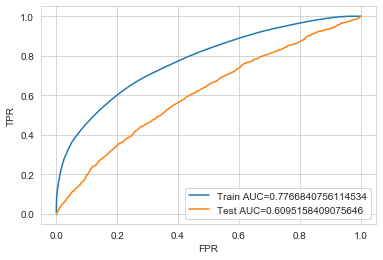

In [57]:
clf=DecisionTreeClassifier(max_depth=50,min_samples_split=500) # INITIALIZING CLASSIFIER
clf.fit(x_train_tfidfwv_vector,y_train) #TRAINING THE DATASET

y_train_tfidfwv_pred=clf.predict_proba(x_train_tfidfwv_vector)  #PREDICTING THE PROBABILITY FOR TRAIN DATASET 
y_test_tfidfwv_pred=clf.predict_proba(x_test_tfidfwv_vector)  #PREDICTING THE PROBABILITY FOR TEST DATASET


train_fpr_tfidfwv,train_tpr_tfidfwv, train_thresholds_tfidfwv=roc_curve(y_train,y_train_tfidfwv_pred[:,1])
test_fpr_tfidfwv,test_tpr_tfidfwv, train_thresholds_tfidfwv=roc_curve(y_test,y_test_tfidfwv_pred[:,1])

sns.set_style("whitegrid")
sns.lineplot(x=train_fpr_tfidfwv , y=train_tpr_tfidfwv , label="Train AUC=" +  str(auc(train_fpr_tfidfwv,train_tpr_tfidfwv)))
sns.lineplot(x=test_fpr_tfidfwv , y=test_tpr_tfidfwv , label="Test AUC=" + str(auc(test_fpr_tfidfwv, test_tpr_tfidfwv)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [58]:
best_t_tfidfwv = find_best_threshold(train_thresholds_tfidfwv,train_fpr_tfidfwv,train_tpr_tfidfwv)

the maximum value of tpr*(1-fpr) 0.4928368525288039 for threshold 0.826


Train confusion matrix


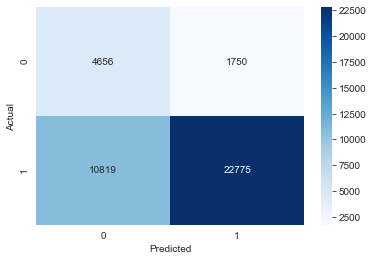

In [59]:
# COMPUTING CONFUSION MATRIX
cm_train_tfidfwv=confusion_matrix(y_train, predict_with_best_t(y_train_tfidfwv_pred[:,1], best_t_tfidfwv))
print("Train confusion matrix")

# PLOTTING CONFUSION MATRIX AS HEAT MAP FOR TRAIN DATASET(SET 2)
sns.heatmap(cm_train_tfidfwv, annot=True,fmt="d",cmap='Blues')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

Test confusion matrix


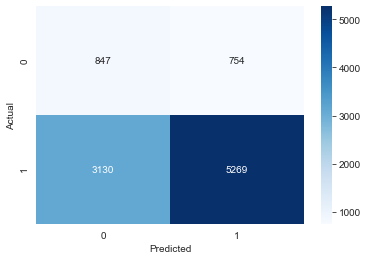

In [91]:
# COMPUTING CONFUSION MATRIX
cm_test_tfidfwv = confusion_matrix(y_test, predict_with_best_t(y_test_tfidfwv_pred[:,1] , best_t_tfidfwv))
print("Test confusion matrix")

# PLOTTING CONFUSION MATRIX AS HEAT MAP FOR TEST DATASET(SET 2)
sns.heatmap(cm_test_tfidfwv, annot=True,fmt="d",cmap='Blues')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

## WORDCLOUD (Set 2)

In [61]:
y_pvalue_tfidfwv=predict_with_best_t(y_test_tfidfwv_pred[:,1] , best_t_tfidfwv)
y_pvalue_tfidfwv=pd.DataFrame(y_pvalue_tfidfwv,index=y_test.index,columns=["y_preg"])
y_pvalue_tfidfwv['y_test']=y_test
fp_wv_index = y_pvalue_tfidfwv[(y_pvalue_tfidfwv["y_test"]==0) & (y_pvalue_tfidfwv["y_preg"]==1)].index

In [62]:
fp_wv_data=x.iloc[fp_wv_index]

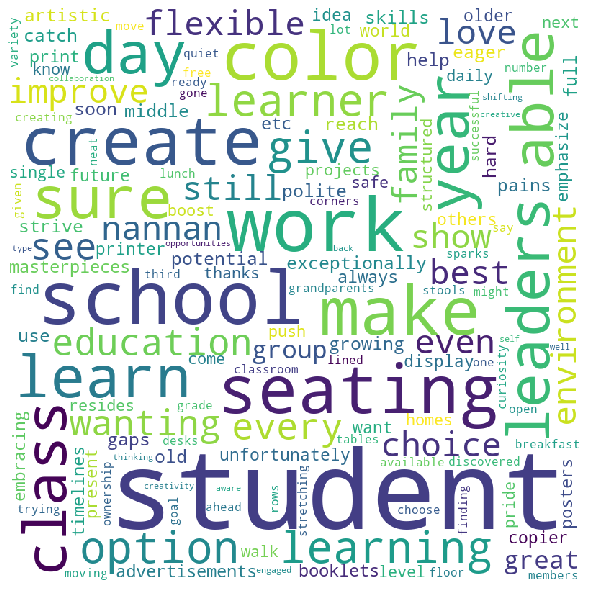

In [63]:
# Wordcloud
#Reference: https://www.geeksforgeeks.org/generating-word-cloud-python/ 
comment_words_wv=''
stopwords = set(STOPWORDS) 
for val in fp_wv_data["essay"][0:2]: 

    comment_words_wv += ( val + " ")

wordcloud_wv = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words_wv) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_wv) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()     

## Boxplot : price(Set 2)

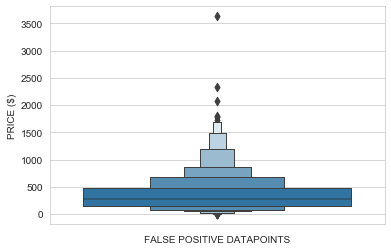

In [64]:
sns.boxenplot(y=fp_wv_data["price"])
plt.xlabel("FALSE POSITIVE DATAPOINTS")
plt.ylabel("PRICE ($)")
plt.show()

## PDF: teacher_number_of_previously_posted_projects (Set 2)

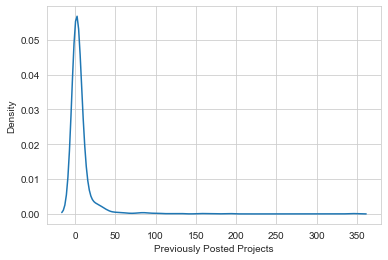

In [65]:
sns.distplot(x=fp_wv_data["teacher_number_of_previously_posted_projects"],hist=False)
plt.xlabel("Previously Posted Projects")
plt.ylabel("Density")
plt.show()

# Part 2
#### Considering features with positive feature imprtance

## FEATURE IMPORTANCE

In [66]:
clf_fi = DecisionTreeClassifier() #Initializing the model
clf_fi.fit(x_train_tfidf_vector,y_train) #Training with Set1 Dataset

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
# Enumeating feature importance
fi_list = np.array(list(enumerate(clf_fi.feature_importances_))) 
col_index = list(fi_list[fi_list[:,1]!=0][:,0].astype(int))

In [84]:
print("No of Important Features=",len(col_index))  

No of Important Features= 2139


### Removing unimportant features

In [69]:
x_train_fi=x_train_tfidf_vector[:,clf_fi.feature_importances_ > 0]

In [70]:
x_test_fi=x_test_tfidf_vector[:,clf_fi.feature_importances_ >0]

## Training With Important Features

### Hyperparameter Tuning

In [71]:
from sklearn.linear_model import LogisticRegression 

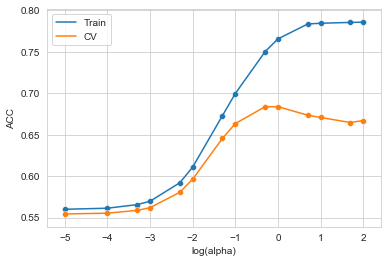

In [72]:
neigh_fi = LogisticRegression() #Initializing Models
paramerters={"C":[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf_fi = GridSearchCV(neigh_fi,param_grid=paramerters,cv=3,scoring="roc_auc",return_train_score=True) #GridSearchCV
clf_fi.fit(x_train_fi,y_train) #Fitting the Dataset

results_fi= pd.DataFrame(clf_fi.cv_results_) #Storing the results
results_fi= results_fi.sort_values(["param_C"]) #Soting the results

train_auc=results_fi["mean_train_score"]
cv_auc=results_fi["mean_test_score"]
C=results_fi["param_C"]

log_c=[]   
for i in C:
    log_c.append(math.log(i,10))

#plotting train and CV auc score    
sns.set_style("whitegrid")
sns.lineplot(x= log_c , y= train_auc , label="Train")
sns.lineplot(x= log_c , y= cv_auc , label="CV")
sns.scatterplot(x= log_c , y = train_auc )
sns.scatterplot(x=log_c , y = cv_auc )
plt.xlabel("log(alpha)")
plt.ylabel("ACC")
plt.legend()
plt.show()

In [73]:
best_C= 100

### Training with best C

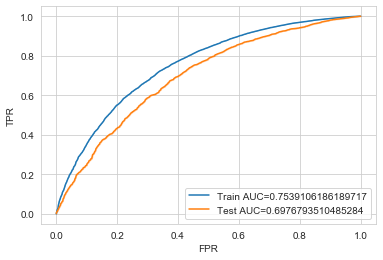

In [79]:

clf_best_fi=LogisticRegression(C=1)
clf_best_fi.fit(x_train_fi,y_train)

y_train_fi_pred= clf_best_fi.predict_proba(x_train_fi)
y_test_fi_pred= clf_best_fi.predict_proba(x_test_fi)

train_fpr_fi,train_tpr_fi, train_thresholds_fi=roc_curve(y_train , y_train_fi_pred[:,1])
test_fpr_fi,test_tpr_fi, train_thresholds_fi=roc_curve(y_test , y_test_fi_pred[:,1])

sns.set_style("whitegrid")
sns.lineplot(x= train_fpr_fi , y= train_tpr_fi , label="Train AUC=" +  str(auc(train_fpr_fi , train_tpr_fi)))
sns.lineplot(x=test_fpr_fi , y=test_tpr_fi , label="Test AUC=" + str(auc(test_fpr_fi , test_tpr_fi)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

# SUMMARY

## Task 1

In [75]:
dict1={"Vectorizer":["TFIDF","TFIDF W2V",],"Model":["Decision Tree","Decision Tree"],"Best Max Depth":[10,5],"Best Min Samples Split":[500,500],"AUC":[0.6078,0.599]}

In [76]:
pd.DataFrame(dict1)

Vectorizer          Model  Best Max Depth  Best Min Samples Split     AUC
0      TFIDF  Decision Tree              10                     500  0.6078
1  TFIDF W2V  Decision Tree               5                     500  0.5990

## Task 2

In [77]:
dict2={"Vectorizer":["TFIDF"],"Model":["Logistic Regression"],"Best Hyperparameter":1,"AUC":[0.6871]}

In [78]:
pd.DataFrame(dict2)

Vectorizer                Model  Best Hyperparameter     AUC
0      TFIDF  Logistic Regression                    1  0.6871